<a href="https://colab.research.google.com/github/Ratan-jeet/ML/blob/main/Complete_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

Missing completely Random then only remove missing data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


## Null values %

In [5]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [6]:
df.shape

(19158, 13)

## Columns with null values less then 5%

In [7]:
col = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0]

In [8]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
2473,0.624,Full time course,High School,10.0,68.0
509,0.910,Full time course,Graduate,2.0,10.0
1925,0.920,no_enrollment,Graduate,9.0,9.0
15598,0.910,no_enrollment,Masters,4.0,18.0
9543,0.923,no_enrollment,High School,4.0,41.0


In [10]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [11]:
# Removing null records for selected columns
new_df = df[col].dropna()

In [12]:
new_df.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9875,0.920,Full time course,High School,4.0,108.0
3254,0.910,no_enrollment,Graduate,6.0,14.0
5908,0.855,no_enrollment,Graduate,3.0,42.0
5822,0.925,no_enrollment,Masters,2.0,13.0
5446,0.920,no_enrollment,Graduate,20.0,23.0


In [13]:
df.sample(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
13732,30898,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,10000+,Pvt Ltd,134.0,0.0
11473,4622,city_100,0.887,Male,Has relevent experience,no_enrollment,Masters,STEM,19.0,500-999,NaN,16.0,0.0
19121,1940,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,100-500,Pvt Ltd,4.0,0.0


## Numerical column should  have same distribution as before

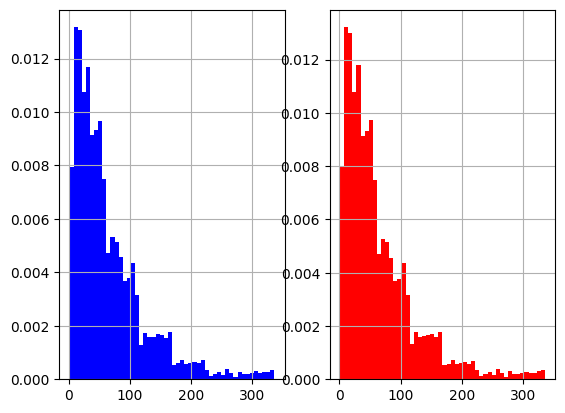

In [14]:
fig = plt.figure()
ax=fig.add_subplot(121)

df['training_hours'].hist(bins=50,ax=ax,density=True,color='blue')

ax=fig.add_subplot(122)
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

plt.show()

<Axes: ylabel='Density'>

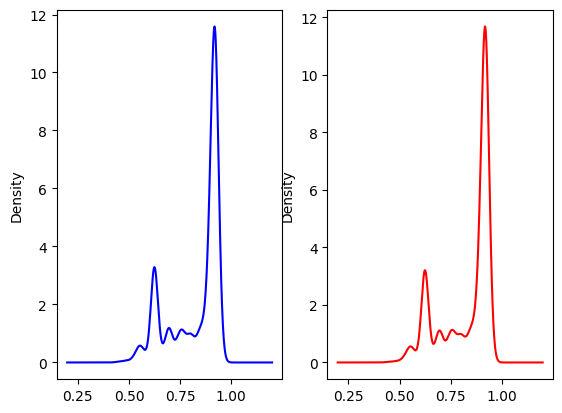

In [15]:
plt.subplot(1,2,1)
df['city_development_index'].plot.density(color='blue')
plt.subplot(1,2,2)
new_df['city_development_index'].plot.density(color='red')


##  Categorical Column should be same ratio as before

In [16]:
df['enrolled_university'].value_counts()/len(df),new_df['enrolled_university'].value_counts()/len(new_df)

(enrolled_university
 no_enrollment       0.721213
 Full time course    0.196106
 Part time course    0.062533
 Name: count, dtype: float64,
 enrolled_university
 no_enrollment       0.735188
 Full time course    0.200733
 Part time course    0.064079
 Name: count, dtype: float64)